 # 771766 Fundamentals of Data Science PROJECT

# CENSUS PROJECT


In [1]:
#IMPORT ALL LIBRARIES

import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


warnings.filterwarnings("ignore")


In [2]:
# Reading in the CSV file
census_df =pd.read_csv("census08.csv")
census_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,George Avenue,Harry,James,60,Head,Single,Male,Unemployed,None,None
1,2,George Avenue,Anne,Johnson,34,Head,Married,Female,Corporate treasurer,None,None
2,2,George Avenue,Jack,Johnson,36,Husband,Married,Male,Product/process development scientist,None,None
3,2,George Avenue,Guy,Johnson,12,Son,NaN,Male,Student,None,NaN
4,3,George Avenue,Simon,Smith,79,Head,Single,Male,Retired Tour manager,Physical Disability,Jewish
...,...,...,...,...,...,...,...,...,...,...,...
8641,1,Robertson Inn,Margaret,Patterson,63,Head,Married,Female,Energy manager,None,Christian
8642,1,Robertson Inn,Oliver,Patterson,68,Husband,Married,Male,Retired Music therapist,None,Christian
8643,1,Robertson Inn,Michael,Patterson,26,Son,Single,Male,"Surveyor, minerals",None,Christian
8644,1,Robertson Inn,Kevin,Patterson,23,Son,Divorced,Male,Newspaper journalist,None,Christian


### Initial Data Observation and Overview

In [3]:
# Check for column information
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8646 entries, 0 to 8645
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8646 non-null   int64 
 1   Street                         8646 non-null   object
 2   First Name                     8646 non-null   object
 3   Surname                        8646 non-null   object
 4   Age                            8646 non-null   object
 5   Relationship to Head of House  8646 non-null   object
 6   Marital Status                 6419 non-null   object
 7   Gender                         8646 non-null   object
 8   Occupation                     8646 non-null   object
 9   Infirmity                      8646 non-null   object
 10  Religion                       6373 non-null   object
dtypes: int64(1), object(10)
memory usage: 743.1+ KB


In [4]:
census_df.duplicated().sum()
census_df.drop_duplicates(inplace = True)

In [5]:
census_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,George Avenue,Harry,James,60,Head,Single,Male,Unemployed,None,None
1,2,George Avenue,Anne,Johnson,34,Head,Married,Female,Corporate treasurer,None,None
2,2,George Avenue,Jack,Johnson,36,Husband,Married,Male,Product/process development scientist,None,None
3,2,George Avenue,Guy,Johnson,12,Son,NaN,Male,Student,None,NaN
4,3,George Avenue,Simon,Smith,79,Head,Single,Male,Retired Tour manager,Physical Disability,Jewish
...,...,...,...,...,...,...,...,...,...,...,...
8641,1,Robertson Inn,Margaret,Patterson,63,Head,Married,Female,Energy manager,None,Christian
8642,1,Robertson Inn,Oliver,Patterson,68,Husband,Married,Male,Retired Music therapist,None,Christian
8643,1,Robertson Inn,Michael,Patterson,26,Son,Single,Male,"Surveyor, minerals",None,Christian
8644,1,Robertson Inn,Kevin,Patterson,23,Son,Divorced,Male,Newspaper journalist,None,Christian


In [6]:
# Checking for data types
census_df.dtypes

House Number                      int64
Street                           object
First Name                       object
Surname                          object
Age                              object
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

In [7]:
# Check for missing values
census_df.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2226
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2272
dtype: int64

In [8]:
sorted(census_df["Street"].unique())

['Albans Pines',
 'Albionfold Road',
 'Archer Drives',
 'Arrows Camp',
 'Atkinson Meadows',
 'Autumn Avenue',
 'Baker Barracks',
 'Baldwin Trafficway',
 'Bassenthwaite River',
 'Belle Prairie',
 'Brass Fort',
 'Bright Fall',
 'Brightondrum Street',
 'Bumblebee View',
 'Byrne Folly',
 'Capricorn Avenue',
 'Carter Rapids',
 'Castor Crescent',
 'Christmas Drive',
 'Clementine Village',
 'Cox Drive',
 'Davies Drive',
 'Doherty Underpass',
 'Durhamlock Drive',
 'Ellis Street',
 'ExcaliburBells Road',
 'Exeter Drive',
 'February Lane',
 'Foxglove Crest',
 'George Avenue',
 'George Lane',
 'Graham Road',
 'Gregory Spring',
 'Henderson Ranch',
 'Hereford Lane',
 'Hicks Field',
 'Holland Ford',
 'Hughes Camp',
 'Hunters Crescent',
 'Inverness Avenue',
 'Jackson Haven',
 'Jones Forge',
 'Kelly Mountain',
 'Kielder Ville',
 'Knight Institute',
 'Leedsbox Crescent',
 'Leisure Court',
 'Lewis Stables',
 'Lime Street',
 'Limehatch Lane',
 'Lloyd Heights',
 'Long Lane',
 'Lucas Loop',
 'Madridgate Dr

In [9]:
# Check for unique values in the age column
census_df["Age"].unique()  

array(['60', '34', '36', '12', '79', '35', '61', '24', '3', '75', '52',
       '14', '11', '42', '25', '28', '40', '57', '55', '22', '18', '43',
       '51', '0', '21', '45', '17', '16', '13', '9', '65', '32', '31',
       '8', '56', '39', '7', '41', '27', '78', '30', '29', '15', '54',
       '19', '84', '38', '33', '6', '1', '48', '10', '5', '49', '46',
       '26', '50', '53', '63', '4', '44', '47', '2', '23', '64', '37',
       '58', '66', '67', '71', '72', '20', '62', '68', '73', '74', '69',
       '81', '70', '59', '89', '105', '87', '80', '77', '76', ' ', '82',
       '88', '49.16040882016717', '54.16040882016717', '3.0', '85', '99',
       '101', '83', '69.13036593215614', '67.13036593215614', '103', '90',
       '93', '86', '96', '85.66111048772531', '87.66111048772531', '34.0',
       '30.0', '26.0', '91', '102', '83.52432893335205',
       '26.999999999999993', '23.999999999999993', '21.999999999999993',
       '16.999999999999993', '92', '97', '69.13473801820774',
       '15

In [10]:
# census_df["Age"] = census_df["Age"].astype(str).astype(int)
# I am not able to cast a particular row withg an empty string so I will locate the exact row and see if we can give it an appropriate age value
census_df.loc[census_df["Age"]== ' ']


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
460,18,Smith Gateway,Dominic,Griffiths,,Son,NaN,Male,Student,None,NaN


In [11]:
#Locating his family for further info
census_df.loc[(census_df["House Number"]== 18) & (census_df["Street"]== "Smith Gateway")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
458,18,Smith Gateway,Kirsty,Griffiths,49,Head,Married,Female,"Doctor, general practice",None,None
459,18,Smith Gateway,Ricky,Griffiths,51,Husband,Married,Male,"Administrator, Civil Service",None,None
460,18,Smith Gateway,Dominic,Griffiths,,Son,NaN,Male,Student,None,NaN


In [12]:
# We can deduce that Dominic Griffiths relationship to head of house is "son" and given he is a student and his mother is 49, we can assume he is 16, given that is the 
census_df["Age"]=census_df["Age"].replace(' ', 16)

In [13]:
# Checking for unique values to find empty strings or incorrect values
census_df["Age"].unique()  

array(['60', '34', '36', '12', '79', '35', '61', '24', '3', '75', '52',
       '14', '11', '42', '25', '28', '40', '57', '55', '22', '18', '43',
       '51', '0', '21', '45', '17', '16', '13', '9', '65', '32', '31',
       '8', '56', '39', '7', '41', '27', '78', '30', '29', '15', '54',
       '19', '84', '38', '33', '6', '1', '48', '10', '5', '49', '46',
       '26', '50', '53', '63', '4', '44', '47', '2', '23', '64', '37',
       '58', '66', '67', '71', '72', '20', '62', '68', '73', '74', '69',
       '81', '70', '59', '89', '105', '87', '80', '77', '76', 16, '82',
       '88', '49.16040882016717', '54.16040882016717', '3.0', '85', '99',
       '101', '83', '69.13036593215614', '67.13036593215614', '103', '90',
       '93', '86', '96', '85.66111048772531', '87.66111048772531', '34.0',
       '30.0', '26.0', '91', '102', '83.52432893335205',
       '26.999999999999993', '23.999999999999993', '21.999999999999993',
       '16.999999999999993', '92', '97', '69.13473801820774',
       '15.

In [14]:
# Converting Age values from string to float
census_df["Age"] = census_df["Age"].astype(str).astype(float)

In [15]:
# Converting from float to integers
census_df["Age"] = census_df["Age"].astype(float).astype(int)

In [16]:
# Now I have casted the ages into integers, all values are appropriate
census_df["Age"].unique() 

array([ 60,  34,  36,  12,  79,  35,  61,  24,   3,  75,  52,  14,  11,
        42,  25,  28,  40,  57,  55,  22,  18,  43,  51,   0,  21,  45,
        17,  16,  13,   9,  65,  32,  31,   8,  56,  39,   7,  41,  27,
        78,  30,  29,  15,  54,  19,  84,  38,  33,   6,   1,  48,  10,
         5,  49,  46,  26,  50,  53,  63,   4,  44,  47,   2,  23,  64,
        37,  58,  66,  67,  71,  72,  20,  62,  68,  73,  74,  69,  81,
        70,  59,  89, 105,  87,  80,  77,  76,  82,  88,  85,  99, 101,
        83, 103,  90,  93,  86,  96,  91, 102,  92,  97,  98])

# Cleaning First Names

In [17]:
# Checking for unique values to find missing strings or incorrect values
# census_df["First Name"].unique()
census_df.loc[census_df["First Name"] == ' '] # Locaing rows with empty string values

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
618,19,Morgan View,,Ali,8,Son,NaN,Male,Student,None,NaN
3266,4,Simmons Course,,Wong,9,Son,NaN,Male,Student,None,NaN
3916,6,ExcaliburBells Road,,Doyle,5,Son,NaN,Male,Student,None,NaN


In [18]:
#Given there are all males, I will assign "JOHNDOE" which is the norm for unknown names
census_df["First Name"] =census_df["First Name"].replace(' ',"JohnDoe")


# Cleaning Surnames

In [19]:
census_df.loc[census_df["Surname"] == ' '] # Locaing rows with empty string values

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2123,24,Morley Lodge,Simon,,56,None,Single,Male,Information officer,None,Christian
3168,33,Morgan Fords,Stephanie,,8,Daughter,NaN,Female,Student,None,NaN


### By Locating the House Number and Street of each of the missing people above, I will get to see the remaining occupants of the house. Possibly they are family members and I can assign the appropriate surname.

In [20]:
# Lets take a look at their families if I can get the appropriate surnames
census_df.loc[(census_df["House Number"] == 24) & (census_df["Street"] == "Morley Lodge") ] 


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2120,24,Morley Lodge,Lisa,Cameron,59,Head,Divorced,Female,Quality manager,None,None
2121,24,Morley Lodge,Gary,Burton,29,None,Single,Male,"Engineer, maintenance (IT)",None,Muslim
2122,24,Morley Lodge,Caroline,Barber,38,None,Single,Female,Pharmacologist,None,Christian
2123,24,Morley Lodge,Simon,,56,None,Single,Male,Information officer,None,Christian


In [21]:
# Since there is no relationship with the House mates, I will check for the mode surname and assign it to Simon
census_df.loc[(census_df["House Number"] == 24) & (census_df["Street"] == "Morley Lodge") & (census_df["Surname"] == " "), "Surname"]= "Smith"

In [22]:
census_df["Surname"].mode() #Find the Mode surname

0    Smith
Name: Surname, dtype: object

In [23]:
#Let us look at the second person in depth as well
census_df.loc[(census_df["House Number"] == 33) & (census_df["Street"] == "Morgan Fords") ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3166,33,Morgan Fords,Lorraine,Griffin,31,Head,Married,Female,Unemployed,None,None
3167,33,Morgan Fords,Henry,Griffin,31,Husband,Married,Male,Acupuncturist,None,None
3168,33,Morgan Fords,Stephanie,,8,Daughter,NaN,Female,Student,None,NaN
3169,33,Morgan Fords,Francis,Griffin,4,Son,NaN,Male,Child,None,NaN
3170,33,Morgan Fords,Kathryn,Dobson,2,Daughter,NaN,Female,Child,None,NaN


In [24]:
# Since her relationship to the head of house is Daughter, I will assign Griffin as her surname appropriately
census_df.loc[(census_df["House Number"] == 33) & (census_df["Street"] == "Morgan Fords") & (census_df["Surname"] == " "),"Surname"]="Griffin"

# Cleaning Relationship to Head of House

In [25]:
# Check for unique values in the age column
sorted(census_df["Relationship to Head of House"].unique())

['Adopted Daughter',
 'Adopted Granddaughter',
 'Adopted Son',
 'Cousin',
 'Daughter',
 'Daughter-in-law',
 'Granddaughter',
 'Grandson',
 'Head',
 'Husband',
 'Lodger',
 'Neice',
 'Nephew',
 'None',
 'Partner',
 'Sibling',
 'Son',
 'Step-Daughter',
 'Step-Son',
 'Visitor',
 'Wife']

# Cleaning Gender
### From observation, I will replace the empty strings with appropriate genders

In [26]:
census_df["Gender"].unique() # Check for empty srtings

array(['Male', 'Female', ' '], dtype=object)

In [27]:
(census_df["Gender"] == " ").sum() # Find total sum of empty strings

2

In [28]:
census_df.loc[census_df["Gender"] == " "] # Locating empty strings

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6013,9,Lime Street,Elizabeth,Dobson,4,Daughter,NaN,,Child,None,NaN
7538,37,Leedsbox Crescent,Liam,Yates,66,Head,Married,,Television production assistant,None,Methodist


### Elizabeth is Female (as she is a 'daughter' and bears a female name)
### Liam is a Male's Name

In [29]:
census_df.loc[(census_df["House Number"] == 9) & (census_df["Street"] == "Lime Street") & (census_df["Gender"] == " "), "Gender"]="Female" 

census_df.loc[(census_df["House Number"] == 37) & (census_df["Street"] == "Leedsbox Crescent") & (census_df["Gender"] == " "), "Gender"]="Male" 

In [30]:
census_df["Gender"].unique() # RE-check to ensure no more empty strings

array(['Male', 'Female'], dtype=object)

# Cleaning Infirmity

In [31]:
sorted(census_df["Infirmity"].unique()) # Check for empty strings

[' ',
 'Blind',
 'Deaf',
 'Disabled',
 'Mental Disability',
 'None',
 'Physical Disability',
 'Unknown Infection']

In [124]:
None_Infirmity = len(census_df[census_df["Infirmity"] == "None"])
total_population = len(census_df)
pct_None_Infirmity =(None_Infirmity/total_population)*100
pct_None_Infirmity

99.2943898207056

In [32]:
census_df[census_df["Infirmity"] == " "] #Locating the rows with empty strings 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
556,1,Morgan View,Sean,Howe,15,Son,NaN,Male,Student,,NaN
909,15,Newfound Station,Lynda,Murphy,24,Head,Single,Female,Public affairs consultant,,Christian
1120,24,Palmer Crescent,Garry,Burns,52,Husband,Married,Male,Actuary,,None
4244,47,Madridgate Drive,Fiona,Lloyd,79,Wife,Married,Female,Retired Contractor,,Methodist
6047,12,Graham Road,Caroline,Bruce,46,Head,Divorced,Female,Chartered management accountant,,Catholic
7727,9,Salmon Lane,Holly,Francis,40,Head,Single,Female,"Programmer, systems",,Catholic


### There is not enough in the dataset to determine the infirmity status for these individuals. I notice the eldest person is 79 and decide to check if there are any persons >=79 without any infirmity(over 180 popped out!!) So I decide to assign the mode value "None" to the 6 missing values

In [33]:
census_df["Infirmity"].mode()

0    None
Name: Infirmity, dtype: object

In [34]:
census_df[(census_df["Infirmity"] == "None") & (census_df["Age"] >= 79)]
# We do not have enough in the data to indicate the state of infirmity. Having taking a closer look and there are people older than 79 with no infirmities. The decision is to assign the 6 missing values to "None" which is also the mode value

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
84,8,Ellis Street,Daniel,Day,84,Head,Divorced,Male,Retired Haematologist,None,None
293,9,Foxglove Crest,Jade,Anderson,81,Head,Divorced,Female,Retired Archivist,None,Catholic
309,17,Foxglove Crest,Alex,Woodward,89,Head,Widowed,Male,Retired Charity officer,None,None
311,19,Foxglove Crest,Melanie,Smith,105,Head,Divorced,Female,"Retired Engineer, chemical",None,Christian
317,23,Foxglove Crest,Joanne,Ellis,87,Head,Single,Female,Retired Information officer,None,Methodist
...,...,...,...,...,...,...,...,...,...,...,...
8341,46,George Lane,Timothy,Thompson,89,Head,Married,Male,Unemployed,None,Methodist
8342,46,George Lane,Caroline,Thompson,87,Wife,Married,Female,Retired Child psychotherapist,None,Methodist
8557,5,Stirling Lane,Russell,Singh,85,Head,Single,Male,Retired Animal technologist,None,None
8558,6,Stirling Lane,Lorraine,Gardner,85,Head,Married,Female,Retired Psychiatrist,None,Christian


In [35]:
census_df["Infirmity"]=census_df["Infirmity"].replace(" ", "None") #Replace all empty strings with "None"

# Dealing with the Misssing Marital Values

In [36]:
census_df["Marital Status"].unique()  #Check for empty strings

array(['Single', 'Married', nan, 'Divorced', 'Widowed', ' '], dtype=object)

In [37]:
census_df[(census_df["Marital Status"] == " ")] #Locating the rows with empty strings 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3205,43,Morgan Fords,Diana,Robinson,39,Wife,,Female,Hospital pharmacist,None,None


### In the case of Diana Robinson, I will check for her Husband to confirm she is a "married wife"

In [38]:
census_df[(census_df["Street"] == "Morgan Fords") & (census_df["House Number"] == 43)] #Locating the Household where she lives

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3204,43,Morgan Fords,Peter,Robinson,42,Head,Married,Male,"Designer, interior/spatial",None,Catholic
3205,43,Morgan Fords,Diana,Robinson,39,Wife,,Female,Hospital pharmacist,None,None
3206,43,Morgan Fords,Wayne,Robinson,12,Son,NaN,Male,Student,None,NaN
3207,43,Morgan Fords,Dale,Robinson,5,Son,NaN,Male,Student,None,NaN
3208,43,Morgan Fords,Charles,Robinson,3,Son,NaN,Male,Child,None,NaN


In [39]:
# Clearly she is married
census_df.loc[(census_df["Street"] == "Morgan Fords") & (census_df["House Number"] == 43) & (census_df["Marital Status"] == " "), "Marital Status"] = "Married"


## Handling the null values in Marital Status 

### For the Population less than 18, it is legally wrong to be married as minors, so I assume for the Marital Status with NaN values in this category, I replace the null values with Minors(Single)

### Also to double check, I will check for if there are special cases where individuals 18 and below have "Relationship to Head of House" status such as Head, Wife, Husband etc..

In [40]:
census_df[census_df["Marital Status"].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3,2,George Avenue,Guy,Johnson,12,Son,NaN,Male,Student,None,NaN
11,4,George Avenue,Marilyn,Alexander-Parry,3,Daughter,NaN,Female,Child,None,NaN
14,6,George Avenue,Brenda,Morton,14,Daughter,NaN,Female,Student,None,NaN
15,6,George Avenue,Samuel,Morton,11,Son,NaN,Male,Student,None,NaN
26,10,George Avenue,Carole,Bradley,3,Daughter,NaN,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8623,1,Jackson Haven,Scott,Harrison,0,Son,NaN,Male,Child,None,NaN
8628,1,Watts Folly,Alex,Wilson,17,Son,NaN,Male,Student,None,NaN
8636,1,Byrne Folly,Dawn,Byrne,8,Daughter,NaN,Female,Student,None,NaN
8637,1,Byrne Folly,Christine,Byrne,6,Daughter,NaN,Female,Student,None,NaN


In [41]:
children_unmaried = census_df[(census_df["Age"]<18) & (census_df["Marital Status"].isnull())] # Children with null values attributed to a variable children_unmarried 

In [42]:
children_unmaried

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3,2,George Avenue,Guy,Johnson,12,Son,NaN,Male,Student,None,NaN
11,4,George Avenue,Marilyn,Alexander-Parry,3,Daughter,NaN,Female,Child,None,NaN
14,6,George Avenue,Brenda,Morton,14,Daughter,NaN,Female,Student,None,NaN
15,6,George Avenue,Samuel,Morton,11,Son,NaN,Male,Student,None,NaN
26,10,George Avenue,Carole,Bradley,3,Daughter,NaN,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8623,1,Jackson Haven,Scott,Harrison,0,Son,NaN,Male,Child,None,NaN
8628,1,Watts Folly,Alex,Wilson,17,Son,NaN,Male,Student,None,NaN
8636,1,Byrne Folly,Dawn,Byrne,8,Daughter,NaN,Female,Student,None,NaN
8637,1,Byrne Folly,Christine,Byrne,6,Daughter,NaN,Female,Student,None,NaN


In [43]:
# I checked for exceptions to see if there are any U-18 whose relationship to Head of House is Head, Husband or Wife given our dataset is similar to the 1800's 
(children_unmaried["Relationship to Head of House"]).unique()

array(['Son', 'Daughter', 'Adopted Son', 'Step-Daughter', 'Step-Son',
       'Grandson', 'Granddaughter', 'None', 'Adopted Daughter', 'Neice',
       'Nephew', 'Adopted Granddaughter'], dtype=object)

In [44]:
# I fill all minors with "Minor(Single)"

children_unmaried["Marital Status"] =children_unmaried["Marital Status"].fillna("Minor(Single)")

In [45]:
# Now, I attribute this into the original census Dataframe to ensure it takes effect

census_df[(census_df["Age"]<18) & (census_df["Marital Status"].isnull())] =children_unmaried 

In [46]:
census_df[census_df["Marital Status"] == "Minor(Single)"]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3,2,George Avenue,Guy,Johnson,12,Son,Minor(Single),Male,Student,None,NaN
11,4,George Avenue,Marilyn,Alexander-Parry,3,Daughter,Minor(Single),Female,Child,None,NaN
14,6,George Avenue,Brenda,Morton,14,Daughter,Minor(Single),Female,Student,None,NaN
15,6,George Avenue,Samuel,Morton,11,Son,Minor(Single),Male,Student,None,NaN
26,10,George Avenue,Carole,Bradley,3,Daughter,Minor(Single),Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8623,1,Jackson Haven,Scott,Harrison,0,Son,Minor(Single),Male,Child,None,NaN
8628,1,Watts Folly,Alex,Wilson,17,Son,Minor(Single),Male,Student,None,NaN
8636,1,Byrne Folly,Dawn,Byrne,8,Daughter,Minor(Single),Female,Student,None,NaN
8637,1,Byrne Folly,Christine,Byrne,6,Daughter,Minor(Single),Female,Student,None,NaN


In [47]:
#checking to see the updated null values in the dataset, we can see there is just 1 null marital value left

census_df.isnull().sum() 

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                      0
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2272
dtype: int64

In [48]:
census_df.loc[census_df["Marital Status"].isnull()]
# marr =census_df[census_df["Marital Status"]=="Married"]
# marr["Age"].mean()

#Locating the null marital value, being a student and 20 which is less than the average age of the married population, higher chances are he is single 



,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [49]:
census_df["Marital Status"].isnull().sum()

0

In [50]:
# Filling the remaining one null value with single

census_df["Marital Status"] =census_df["Marital Status"].fillna("Single") 

In [51]:
# At this point Marital status is cleaned

census_df.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                      0
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2272
dtype: int64

## Graphical representation of Marital status

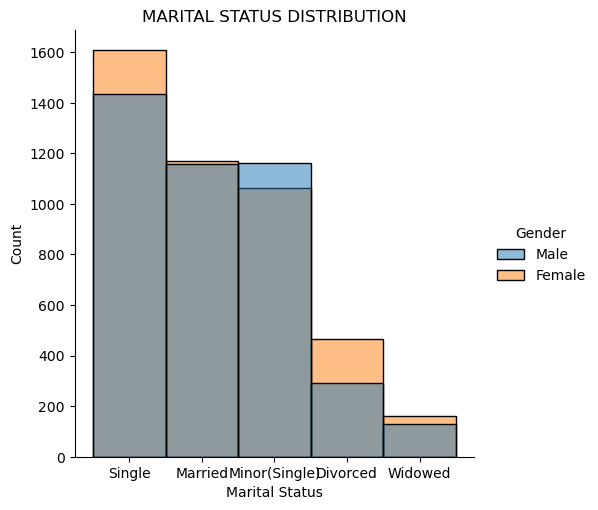

In [52]:
Marital_Status_fig =sns.displot(census_df, x="Marital Status",hue ="Gender")
plt.title("MARITAL STATUS DISTRIBUTION")
plt.grid(False)
plt.show()

Marital_Status_fig.savefig('./Marital_Status.png') # Saving out my figure


# Dealing with the Misssing Religion Values

In [53]:
census_df["Religion"].unique() 


array(['None', nan, 'Jewish', 'Catholic', 'Christian', 'Methodist',
       'Muslim', 'Sikh', 'Orthodoxy', 'Baptist', 'Undecided', 'Buddist',
       ' ', 'Nope'], dtype=object)

### I will treat for the nan values, the ' ' values and "Nope" values

In [54]:
missing_religion = census_df.loc[census_df["Religion"].isnull()]
missing_religion

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3,2,George Avenue,Guy,Johnson,12,Son,Minor(Single),Male,Student,None,NaN
11,4,George Avenue,Marilyn,Alexander-Parry,3,Daughter,Minor(Single),Female,Child,None,NaN
14,6,George Avenue,Brenda,Morton,14,Daughter,Minor(Single),Female,Student,None,NaN
15,6,George Avenue,Samuel,Morton,11,Son,Minor(Single),Male,Student,None,NaN
23,9,George Avenue,Jason,Griffin,18,Head,Divorced,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8623,1,Jackson Haven,Scott,Harrison,0,Son,Minor(Single),Male,Child,None,NaN
8628,1,Watts Folly,Alex,Wilson,17,Son,Minor(Single),Male,Student,None,NaN
8636,1,Byrne Folly,Dawn,Byrne,8,Daughter,Minor(Single),Female,Student,None,NaN
8637,1,Byrne Folly,Christine,Byrne,6,Daughter,Minor(Single),Female,Student,None,NaN


### To treat the Nan Values in the Religion Column, I will write a function to create a dictionary to store the region of the head of each house and assign the missing values for those living in that Household. The idea is most likely the religion practiced by the Head of the house will be followed by the other members of the house 

In [55]:
def update_missing_religion(df):
    
    # Creating a dictionary of household heads and their religions
    head_religion = {}
    # Iterate over the Dataframe and store the religion of the Head of House in the dictionary{}
    for index, row in df.iterrows():
        if row['Relationship to Head of House'] == 'Head': # Check if the person is Head of House. If yes,
            head_religion[(row['House Number'], row['Street'])] = row['Religion'] #Add the religion of the person to the dictionary
    
    # Iterate over rows in DataFrame and fill in missing 'Religion' values based on household head religion
    for index, row in df.iterrows():
        if pd.isnull(row['Religion']): # Check if the religion is null
            if (row['House Number'], row['Street']) in head_religion: # Check if the House Number and Street is in Head_religion
                df.loc[index, 'Religion'] = head_religion[(row['House Number'], row['Street'])] # Now replace the missing value with the corresponding religion in Head_religion
    
    return df
    


In [56]:
# Applying the fuction to my Census dataframe
census_df = update_missing_religion(census_df)

In [57]:
# Checking if there are remainning individuals with nan values for Religion
census_df.loc[(census_df["Religion"].isnull())]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
23,9,George Avenue,Jason,Griffin,18,Head,Divorced,Male,Student,None,NaN
286,4,Foxglove Crest,Robin,Hill,18,Head,Single,Male,Student,None,NaN
287,4,Foxglove Crest,Melissa,Stephens,19,Partner,Single,Female,University Student,None,NaN
318,24,Foxglove Crest,Mary,Howard,18,Head,Single,Female,Student,None,NaN
562,4,Morgan View,James,Rahman,18,Head,Married,Male,Student,None,NaN
563,4,Morgan View,Tina,Rahman,19,Wife,Married,Female,University Student,None,NaN
1225,53,Palmer Crescent,Chelsea,Oliver,18,Head,Single,Female,Student,None,NaN
1382,96,Palmer Crescent,Bernard,Baker,18,Head,Widowed,Male,Student,None,NaN
2831,16,Polaris Estates,Dylan,Preston,18,Head,Single,Male,Student,None,NaN
3422,99,Westminster Drives,Christopher,Gill,18,Head,Divorced,Male,Student,None,NaN


In [58]:
# I assign the remaining individuals without a Religion Values to None as it is the mode religion and we cannot possibly impose any religion on them
census_df["Religion"].fillna("None", inplace=True)


In [59]:
census_df["Religion"].unique()

array(['None', 'Jewish', 'Catholic', 'Christian', 'Methodist', 'Muslim',
       'Sikh', 'Orthodoxy', 'Baptist', 'Undecided', 'Buddist', ' ',
       'Nope'], dtype=object)

## Treating the empty strings in Religion

In [60]:
census_df[census_df["Religion"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7069,4,Parsons Stream,Neil,Hall,34,Husband,Married,Male,Mining engineer,None,
7809,1,Cox Drive,Valerie,Arnold,57,Head,Single,Female,Unemployed,None,
8385,57,George Lane,Debra,Davies,31,Head,Married,Female,Barista,None,
8387,57,George Lane,Douglas,Davies,5,Son,Minor(Single),Male,Student,None,
8388,57,George Lane,Gerald,Davies,3,Son,Minor(Single),Male,Child,None,
8433,67,George Lane,Ashleigh,Martin,38,Lodger,Single,Female,Minerals surveyor,None,


In [61]:
census_df[(census_df["Street"] == "Parsons Stream") & (census_df["House Number"] == 4)]

# For the first House, the Mother's religionis none so I will attribute that to the rest of the family

census_df.loc[(census_df["Street"] == "Parsons Stream") & (census_df["House Number"] == 4) & (census_df["Religion"] ==" " ), "Religion"] = "None"

In [62]:
census_df[(census_df["Street"] == "Cox Drive") & (census_df["House Number"] == 1)]

# For the second House, the Daughter's religion is Christian so I will attribute that to him

census_df.loc[(census_df["Street"] == "Cox Drive") & (census_df["House Number"] == 1) & (census_df["Religion"] ==" " ), "Religion"] = "Christian"

In [63]:
census_df[(census_df["Street"] == "George Lane") & (census_df["House Number"] == 57)]

#For the third House,I assign None 

census_df.loc[(census_df["Street"] == "George Lane") & (census_df["House Number"] == 57) & (census_df["Religion"] ==" " ), "Religion"] = "None"

In [64]:
census_df[(census_df["Street"] == "George Lane") & (census_df["House Number"] == 67)]

#For the fourth House, I assign none

census_df.loc[(census_df["Street"] == "George Lane") & (census_df["House Number"] == 67) & (census_df["Religion"] ==" " ), "Religion"] = "None"

In [65]:
census_df["Religion"].unique()

array(['None', 'Jewish', 'Catholic', 'Christian', 'Methodist', 'Muslim',
       'Sikh', 'Orthodoxy', 'Baptist', 'Undecided', 'Buddist', 'Nope'],
      dtype=object)

### Treating the Nope values in Religion

In [66]:
census_df[census_df["Religion"] == "Nope"]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8040,8,Robinson Road,Daniel,Young,27,Lodger,Single,Male,Science writer,None,Nope


In [116]:
census_df[census_df["Religion"] == "Undecided"]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Commuters,Birth Year
6324,15,Gregory Spring,Heather,Jenkins,54,Head,Married,Female,Event organiser,None,Undecided,False,1827
6325,15,Gregory Spring,Kyle,Jenkins,53,Husband,Married,Male,"Clinical scientist, histocompatibility and imm...",None,Undecided,True,1828
6326,15,Gregory Spring,Steven,Jenkins,29,Son,Single,Male,Pharmacologist,None,Undecided,False,1852


In [117]:
census_df.loc[census_df['Religion'] == 'Undecided', 'Religion'] = 'None'

In [118]:
census_df.loc[census_df['Religion'] == 'Nope', 'Religion'] = 'None'


In [119]:
census_df["Religion"].unique()

array(['None', 'Jewish', 'Catholic', 'Christian', 'Methodist', 'Muslim',
       'Sikh', 'Orthodoxy', 'Baptist', 'Buddist'], dtype=object)

## A Chart showing Religion Distribution of the Town after Cleaning

### Christianity Evidently appears to be the Dominant Religion with Pentecostals leading the way followed by Catholics and Methodists

### More will follow when I check for Religous affiliations by Age group

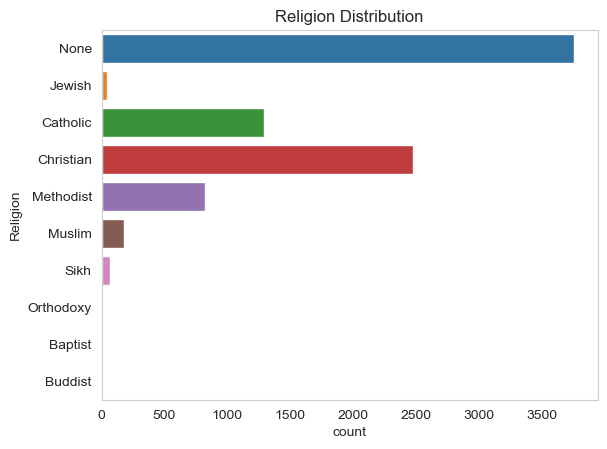

In [120]:
Religion_fig =sns.countplot(census_df, y="Religion")
plt.title("Religion Distribution")
plt.grid(False)

plt.show()

Religion_fig.get_figure().savefig('./Religion_fig.png') # Saving out my figure

### Religion by Numbers

In [70]:
total_population = len(census_df)
None_religion = len(census_df[census_df["Religion"] == "None"])
None_religion_percentage = (None_religion / total_population) * 100

print(f"{None_religion}  have no religion.")
print(f"{None_religion_percentage:.2f}% of the population have no religion.")

3753  have no religion.
43.41% of the population have no religion.


In [71]:
Christians = len(census_df[census_df["Religion"] == "Christian"])
Christians_percentage = (Christians / total_population) * 100

print(f"{Christians}  are Christians.")
print(f"{Christians_percentage:.2f}% of the population are Christians.")

2473  are Christians.
28.61% of the population are Christians.


In [72]:
Catholics = len(census_df[census_df["Religion"] == "Catholic"])
Catholics_percentage = (Catholics / total_population) * 100

print(f"{Catholics}  are Catholics.")
print(f"{Catholics_percentage:.2f}% of the population are Catholics.")

1291  are Catholics.
14.93% of the population are Catholics.


# Dealing with Occupation Column

### Along the line I will create a copy dataframe where I will group the Occupation columns into 5 disticnts values for further analysis on the employment vs unemployment trends amongst other analysis 

In [73]:
sorted(census_df["Occupation"].unique(), reverse =True)

['Youth worker',
 'Writer',
 'Wellsite geologist',
 'Web designer',
 'Water quality scientist',
 'Water engineer',
 'Waste management officer',
 'Warehouse manager',
 'Warden/ranger',
 'Volunteer coordinator',
 'Visual merchandiser',
 'Video editor',
 'Veterinary surgeon',
 'University Student',
 'Unemployed',
 'Tree surgeon',
 'Travel agency manager',
 'Transport planner',
 'Translator',
 'Training and development officer',
 'Trading standards officer',
 'Trade union research officer',
 'Trade mark attorney',
 'Toxicologist',
 'Town planner',
 'Tourist information centre manager',
 'Tourism officer',
 'Tour manager',
 'Therapist, sports',
 'Therapist, speech and language',
 'Therapist, occupational',
 'Therapist, nutritional',
 'Therapist, music',
 'Therapist, horticultural',
 'Therapist, drama',
 'Therapist, art',
 'Therapeutic radiographer',
 'Theme park manager',
 'Theatre stage manager',
 'Theatre manager',
 'Theatre director',
 'Textile designer',
 'Television/film/video producer

### Comparing Child, Students and Uni students

In [74]:
child = census_df[(census_df["Occupation"] == "Child")]

In [75]:
student = census_df[(census_df["Occupation"] == "Student")]

In [76]:
uni_stud = census_df[census_df["Occupation"]== "University Student"]

In [77]:
# upd_uni_stud = census_df_segmented[census_df_segmented["Category"]== "University Student"]

In [78]:
# upd_uni_stud.count()

In [79]:
student.count()

House Number                     1777
Street                           1777
First Name                       1777
Surname                          1777
Age                              1777
Relationship to Head of House    1777
Marital Status                   1777
Gender                           1777
Occupation                       1777
Infirmity                        1777
Religion                         1777
dtype: int64

In [80]:
uni_stud.count()

House Number                     585
Street                           585
First Name                       585
Surname                          585
Age                              585
Relationship to Head of House    585
Marital Status                   585
Gender                           585
Occupation                       585
Infirmity                        585
Religion                         585
dtype: int64

### per UK laws, 66 is the retirement age. Checking for ages 66 and above who are unemployed and assigning them 'retired' instead

In [81]:
# Check for persons aged 66 and above with unemployed status
census_df[(census_df["Age"]>=66) & (census_df["Occupation"] == "Unemployed")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
251,11,Albionfold Road,Emma,Cooke,75,Head,Divorced,Female,Unemployed,None,Catholic
315,22,Foxglove Crest,Emily,Jones,68,Head,Widowed,Female,Unemployed,None,None
407,18,Salford Street,Francesca,Barrett,66,Head,Single,Female,Unemployed,None,None
502,42,Smith Gateway,Steven,Taylor,67,Head,Widowed,Male,Unemployed,None,Christian
1052,7,Palmer Crescent,Brandon,Carey,72,Head,Widowed,Male,Unemployed,None,Christian
1135,28,Palmer Crescent,Kevin,Norton,79,Head,Widowed,Male,Unemployed,None,None
1763,27,Bassenthwaite River,Stewart,Jordan,67,Head,Widowed,Male,Unemployed,None,Christian
1882,2,Long Lane,Chelsea,Burgess-Palmer,66,Head,Single,Female,Unemployed,None,Christian
2605,28,Owen Road,Wayne,Robinson,66,Head,Widowed,Male,Unemployed,None,None
2760,35,Toucan Drive,Gerard,Taylor,84,Head,Divorced,Male,Unemployed,None,Catholic


### A for loop to handle likely retired folks with unemployed status

In [82]:
for index, row in census_df.iterrows(): # Iterate through the rows
    if row["Age"] >= 66 and row["Occupation"]== "Unemployed": # If the age is >=66 and occupation is Unemployed
        census_df.loc[index, "Occupation"] = "Retired" # Make the Occupation Retired instead


In [83]:
# All unemployed 66 and above have been made Retired
census_df[(census_df["Age"]>=66) & (census_df["Occupation"] == "Unemployed")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### Creating a copy df to further classify the Ocuupation columns into sectors

In [84]:
census_df_segmented = census_df.copy()

In [85]:
# A function to segment occupation into categories
def categorize_occupation(occupation):
    if 'Retired' in occupation:
        return 'Retired'
    elif 'University' in occupation and 'Student' in occupation:
        return 'University Student'
    elif 'PhD' in occupation:
        return 'University Student'
    elif 'Student' in occupation:
        return 'Student'
    elif 'Unemployed' in occupation:
        return 'Unemployed'
    else:
        return 'Employed'


census_df_segmented['Occupation'] = census_df['Occupation']
census_df_segmented['Category'] = census_df_segmented['Occupation'].apply(categorize_occupation)

# Print the first 10 rows of the new DataFrame
census_df_segmented


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Category
0,1,George Avenue,Harry,James,60,Head,Single,Male,Unemployed,None,None,Unemployed
1,2,George Avenue,Anne,Johnson,34,Head,Married,Female,Corporate treasurer,None,None,Employed
2,2,George Avenue,Jack,Johnson,36,Husband,Married,Male,Product/process development scientist,None,None,Employed
3,2,George Avenue,Guy,Johnson,12,Son,Minor(Single),Male,Student,None,None,Student
4,3,George Avenue,Simon,Smith,79,Head,Single,Male,Retired Tour manager,Physical Disability,Jewish,Retired
...,...,...,...,...,...,...,...,...,...,...,...,...
8641,1,Robertson Inn,Margaret,Patterson,63,Head,Married,Female,Energy manager,None,Christian,Employed
8642,1,Robertson Inn,Oliver,Patterson,68,Husband,Married,Male,Retired Music therapist,None,Christian,Retired
8643,1,Robertson Inn,Michael,Patterson,26,Son,Single,Male,"Surveyor, minerals",None,Christian,Employed
8644,1,Robertson Inn,Kevin,Patterson,23,Son,Divorced,Male,Newspaper journalist,None,Christian,Employed


In [86]:
census_df_segmented["Category"].unique()

array(['Unemployed', 'Employed', 'Student', 'Retired',
       'University Student'], dtype=object)

## Visual Representation of the Employment status of the Town

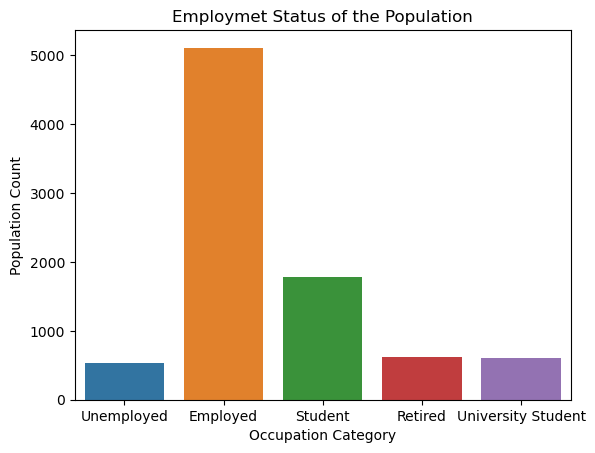

In [87]:
Employment_fig =sns.countplot(census_df_segmented, x="Category")
plt.ylabel('Population Count')
plt.xlabel('Occupation Category')
plt.title('Employmet Status of the Population')
plt.grid(False)
plt.show()

Employment_fig.get_figure().savefig('./Employment_fig.png') # Saving out my figure

### Percentage of unemployed population

In [88]:
unemployed_population = len(census_df_segmented[census_df_segmented["Occupation"] == "Unemployed"])
unemployed_percentage = (unemployed_population / total_population) * 100

print(f"{unemployed_population} of 8645 persons are Unemployed.")
print(f"{unemployed_percentage:.2f}% of the population are Unemployed.")

529 of 8645 persons are Unemployed.
6.12% of the population are Unemployed.


In [115]:
Retired = len(census_df_segmented[census_df_segmented["Category"] == "Retired"])
Retired_percentage = (Retired / total_population) * 100

print(f"{Retired} are Retired.")
print(f"{Retired_percentage:.2f}% are Retired.")

624 are Retired.
7.22% are Retired.


In [114]:
len(census_df_segmented)

8645

## Identifying Commuters

### Critical observation of the Occupation unique values to identify likely commutersin the town

In [90]:
sorted(census_df["Occupation"].unique(), reverse= True)

['Youth worker',
 'Writer',
 'Wellsite geologist',
 'Web designer',
 'Water quality scientist',
 'Water engineer',
 'Waste management officer',
 'Warehouse manager',
 'Warden/ranger',
 'Volunteer coordinator',
 'Visual merchandiser',
 'Video editor',
 'Veterinary surgeon',
 'University Student',
 'Unemployed',
 'Tree surgeon',
 'Travel agency manager',
 'Transport planner',
 'Translator',
 'Training and development officer',
 'Trading standards officer',
 'Trade union research officer',
 'Trade mark attorney',
 'Toxicologist',
 'Town planner',
 'Tourist information centre manager',
 'Tourism officer',
 'Tour manager',
 'Therapist, sports',
 'Therapist, speech and language',
 'Therapist, occupational',
 'Therapist, nutritional',
 'Therapist, music',
 'Therapist, horticultural',
 'Therapist, drama',
 'Therapist, art',
 'Therapeutic radiographer',
 'Theme park manager',
 'Theatre stage manager',
 'Theatre manager',
 'Theatre director',
 'Textile designer',
 'Television/film/video producer

### Potential keywords in job titles likely to be commuters 

#### ["University student", "PhD student", "Professor", "Lecturer", "Air","Sales", "Marketer", "Marine", "Press", "Trade", "Research", "Tour", "Naval", "Logistics", "Geologist", "Journalist", "International", "Hydro", "Geoscientist", "Surveyor", "Engineer", "Scientist", "Cabin"  ]

### A function to check for likely commuters and put them in a new column "Commuters". This Column will contain boolean values to show if a person is a commuter or not. Retired people will be exempted in the iteration.

### I will apply and assign this funtion to my dataframe

In [91]:
def check_commuters(df):
   
    # Create a list of likely commuter keywords
    keywords = ["University student", "PhD student", "Professor", "Lecturer", "Air","Sales", "Marketer", "Marine", "Press", "Trade", "Research", "Tour", "Naval", "Logistics", "Geologist", "Journalist", "International", "Hydro", "Geoscientist", "Surveyor", "Engineer", "Scientist", "Cabin"  ]
    
    # Create a new column called "Commuters" Initializing with False
    df['Commuters'] = False
    
    # Loop through the "Occupation" column and check for likely commuters
    for job, occupation in enumerate(df['Occupation']):
        if occupation.startswith("Retired"):
            # Skip if occupation starts with "Retired"
            continue
        for keyword in keywords:
            if keyword.lower() in occupation.lower():
                # Set "Commuters" to True if occupation is a likely commuter
                df.at[job, 'Commuters'] = True
                break
    return df


In [92]:
#Call the function and attribute it to my dataframe
census_df = check_commuters(census_df)
census_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Commuters
0,1,George Avenue,Harry,James,60,Head,Single,Male,Unemployed,None,None,False
1,2,George Avenue,Anne,Johnson,34,Head,Married,Female,Corporate treasurer,None,None,False
2,2,George Avenue,Jack,Johnson,36,Husband,Married,Male,Product/process development scientist,None,None,True
3,2,George Avenue,Guy,Johnson,12,Son,Minor(Single),Male,Student,None,None,False
4,3,George Avenue,Simon,Smith,79,Head,Single,Male,Retired Tour manager,Physical Disability,Jewish,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8641,1,Robertson Inn,Margaret,Patterson,63,Head,Married,Female,Energy manager,None,Christian,False
8642,1,Robertson Inn,Oliver,Patterson,68,Husband,Married,Male,Retired Music therapist,None,Christian,True
8643,1,Robertson Inn,Michael,Patterson,26,Son,Single,Male,"Surveyor, minerals",None,Christian,True
8644,1,Robertson Inn,Kevin,Patterson,23,Son,Divorced,Male,Newspaper journalist,None,Christian,True


### From the new column created, I will check for the Total number, and %(pct) of likey commuters in the population

In [93]:
total_population = len(census_df)

commuter_population = len(census_df[census_df['Commuters'] == True]) # Number of likely commuters
commuter_percentage = (commuter_population / total_population) * 100 # Percentage of likely commuters

print(f"{commuter_population} of 8645 persons are likely commuters.")
print(f"{commuter_percentage:.2f}% of the population are likely commuters.")

1776 of 8645 persons are likely commuters.
20.54% of the population are likely commuters.


### Commuters vs Non-Commuters: A graphical Representation

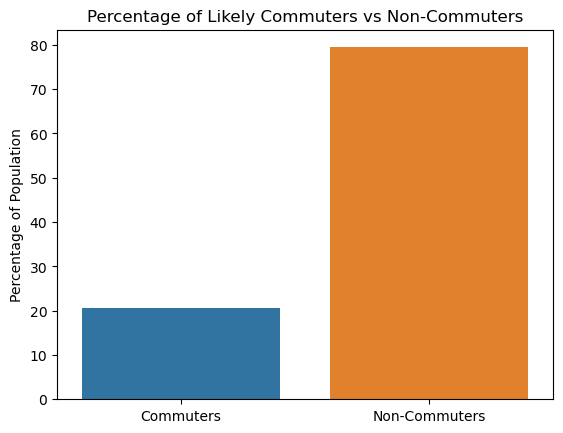

In [94]:
# Convert Commuters column to numeric data type
census_df['Commuters'] = pd.to_numeric(census_df['Commuters'])


# Create a barplot to show percentage of commuters in comparison to non-commuters
commuters_fig =sns.barplot(x=['Commuters', 'Non-Commuters'], y=[commuter_percentage, 100-commuter_percentage])
plt.ylabel('Percentage of Population')
plt.title('Percentage of Likely Commuters vs Non-Commuters')
plt.grid(False)
plt.show()

commuters_fig.get_figure().savefig('./commuters_fig.png') # Saving out my figure

## Examining the Unemployment Trends

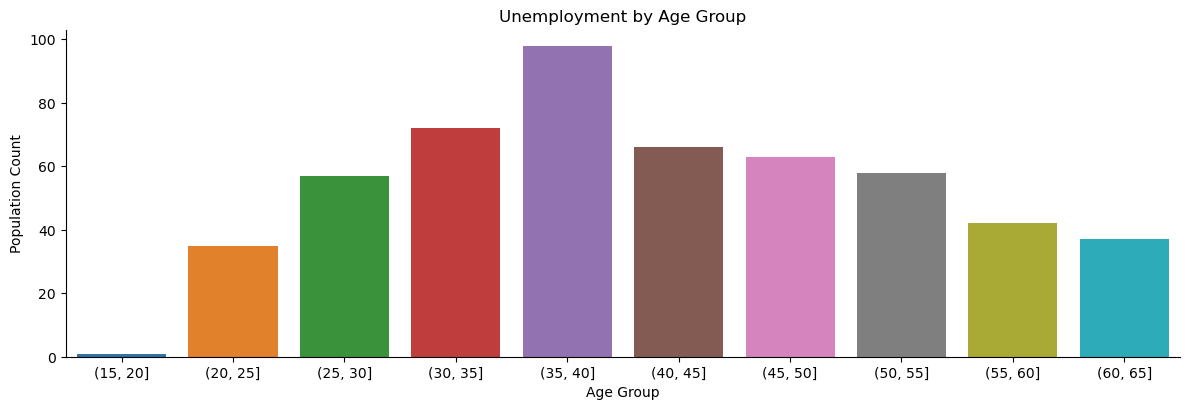

In [95]:
# Define the age group


age_bins = range(15, 70, 5) # This is a reasonable bracket to encompass the working population


# Categorize the age column into age bands
census_df_segmented['Age Group'] = pd.cut(census_df['Age'], bins=age_bins)

# Group the data by age band and unemployment status
unemp_by_age = census_df_segmented.groupby(['Age Group', 'Occupation'])['First Name'].count().reset_index()

# Filter only the unemployed individuals
unemp_by_age = unemp_by_age[unemp_by_age['Occupation'] == 'Unemployed']

# Plot the unemployment trend by age band

unemp_age_group=sns.catplot(x="Age Group", y="First Name", data=unemp_by_age, kind="bar", height=4, aspect=3)
plt.title("Unemployment by Age Group")
plt.ylabel("Population Count")
plt.grid(False)
plt.show()

unemp_age_group.savefig('./unemp_age_group.png') # Saving out my figure

## Examining the Age distribution with Age Pyramid

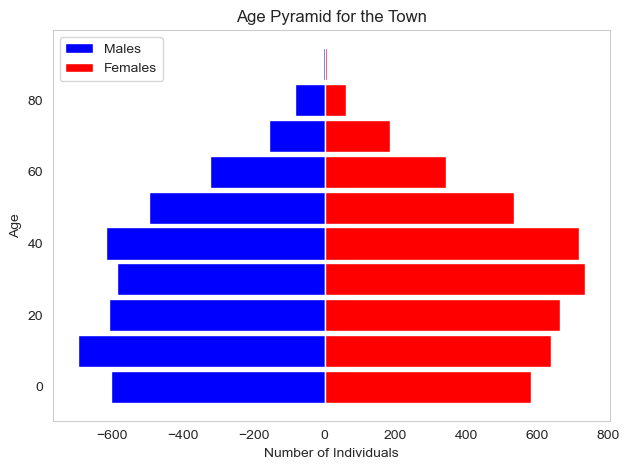

In [134]:
# Define the age bins for the pyramid
age_bins = range(0, 110, 10)

# Compute the age counts for males and females
male_age_counts, _ = np.histogram(census_df[census_df['Gender'] == 'Male']['Age'], bins=age_bins)
female_age_counts, _ = np.histogram(census_df[census_df['Gender'] == 'Female']['Age'], bins=age_bins)

# Create a horizontal bar chart for males with negative height values
plt.barh(age_bins[:-1], -male_age_counts, height=9,  color='blue', label='Males')
# Create a horizontal bar chart for females with positive height values
plt.barh(age_bins[:-1], female_age_counts, height=9,  color='red', label='Females')

# Set the axis labels and title
plt.xlabel('Number of Individuals')
plt.ylabel('Age')
plt.title('Age Pyramid for the Town')

# Show the legend and grid lines
plt.legend(loc='upper left')
# plt.grid(axis='x', linestyle='--', alpha=0.7)


plt.grid(False)

# Show the plot
plt.tight_layout()

plt.savefig('./Age_pyramid.png') # Saving out my figure

## Examining the Religous Affiliations by Age group

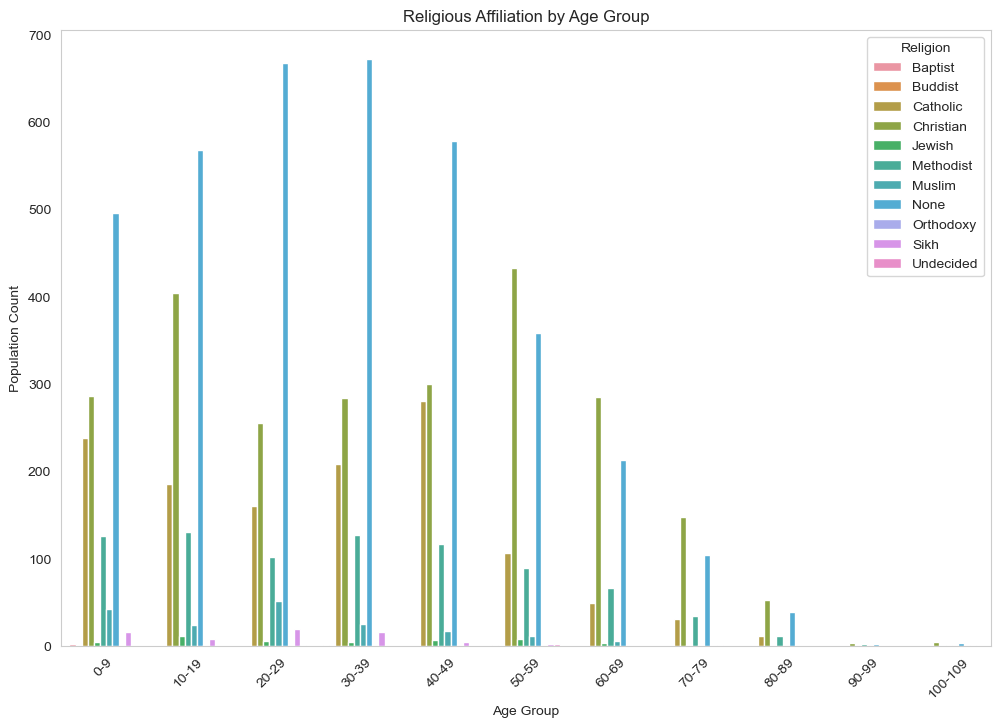

In [97]:
age_bins = np.arange(0, 120, 10)
age_labels = ['{}-{}'.format(i, i+9) for i in range(0, 110, 10)]
census_df_segmented['Age Group'] = pd.cut(census_df_segmented['Age'], bins=age_bins, labels=age_labels)
# group population data by age group and religion
census_df_segmented_religion = census_df_segmented.groupby(['Age Group', 'Religion'])['First Name'].count().reset_index()

# plot the data using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
religion_age_group_fig =sns.barplot(x='Age Group', y='First Name', hue='Religion', data=census_df_segmented_religion)
plt.title('Religious Affiliation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Population Count')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

religion_age_group_fig.get_figure().savefig('./religion_age_group_fig.png') # Saving out my figure

## Examine the Divorce and Marriage rate per 1000 of the population

In [98]:
# filter dataframe by marital status
Divorced_number = len(census_df[census_df['Marital Status'] == 'Divorced'])
Married_number = len(census_df[census_df['Marital Status'] == 'Married'])

# calculate marriage and divorce rates
population_size = 8645
marriage_rate = (Married_number / population_size) * 1000
divorce_rate = (Divorced_number / population_size) * 1000

print("Marriage rate per 1000 of the population:", marriage_rate)
print("Divorce rate per 1000 of the population:", divorce_rate)


Marriage rate per 1000 of the population: 269.51995373048004
Divorce rate per 1000 of the population: 87.21804511278197


## Examine the Housing Occupancy Level

In [99]:
# Group individuals by street and house number
grouped_population = census_df.groupby(['Street', 'House Number'])

# Calculate the number of people in each household
occupants = grouped_population.size()

# Calculate the total number of people
total_people = occupants.sum()

# Calculate the total number of houses
total_houses = len(grouped_population)

# Calculate the occupancy level
occupancy_level = total_people / total_houses

print(f"Occupancy level: {occupancy_level:.2f} people per house")


Occupancy level: 2.98 people per house


In [100]:
# Create a new DataFrame to hold households with lodgers
Household_lodger = census_df[census_df['Relationship to Head of House'] == 'Lodger']

# # Calculate the average number of lodgers per household
# average_lodgers = Household_lodger['Number of Lodgers'].mean()

# print("The average number of lodgers per household with lodgers only is: ", average_lodgers)


In [128]:
none_relation = census_df[census_df['Relationship to Head of House'] == 'None']
none_relation

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Commuters,Birth Year
17,7,George Avenue,Luke,Bennett,25,None,Single,Male,Conference centre manager,None,Catholic,False,1856
18,7,George Avenue,Josh,Berry,28,None,Single,Male,"Designer, blown glass/stained glass",None,Christian,False,1853
19,7,George Avenue,Laura,Walker,40,None,Single,Female,Bonds trader,None,Catholic,True,1841
111,11,Ellis Street,Charlene,Khan,18,None,Single,Female,Student,None,Catholic,False,1863
112,11,Ellis Street,Nicole,Holt,50,None,Divorced,Female,Rural practice surveyor,None,None,True,1831
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8581,1,Brass Fort,Kirsty,Young,22,None,Single,Female,University Student,None,None,False,1859
8595,1,Matthews Folly,Bryan,Kemp,44,None,Single,Male,Health service manager,None,None,True,1837
8596,1,Matthews Folly,Abbie,Stewart,58,None,Single,Female,Planning and development surveyor,None,Catholic,False,1823
8597,1,Matthews Folly,Graeme,Powell,42,None,Single,Male,Teaching laboratory technician,None,Methodist,True,1839


In [101]:
Household_lodger

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Commuters
46,2,Ellis Street,Maria,Hayward,56,Lodger,Single,Female,Theatre director,None,Christian,False
58,4,Ellis Street,Gregory,Smith,41,Lodger,Single,Male,Leisure centre manager,None,Catholic,False
59,4,Ellis Street,Craig,Hartley,27,Lodger,Single,Male,Print production planner,None,Catholic,False
98,9,Ellis Street,Christian,Phillips,56,Lodger,Single,Male,Geophysicist/field seismologist,None,None,False
108,10,Ellis Street,Amber,Bradley,49,Lodger,Single,Female,Operations geologist,None,Catholic,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8503,82,George Lane,Sharon,Hilton,51,Lodger,Single,Female,"Designer, graphic",None,Christian,False
8592,1,Knight Institute,Carol,Evans,18,Lodger,Single,Female,Student,None,None,False
8616,1,Strathclyde Stables,Henry,Sutton,51,Lodger,Single,Male,Child psychotherapist,None,Christian,True
8631,1,Winter Keep,Jason,Martin,30,Lodger,Single,Male,Prison officer,None,None,True


## Age Distribution of the Population

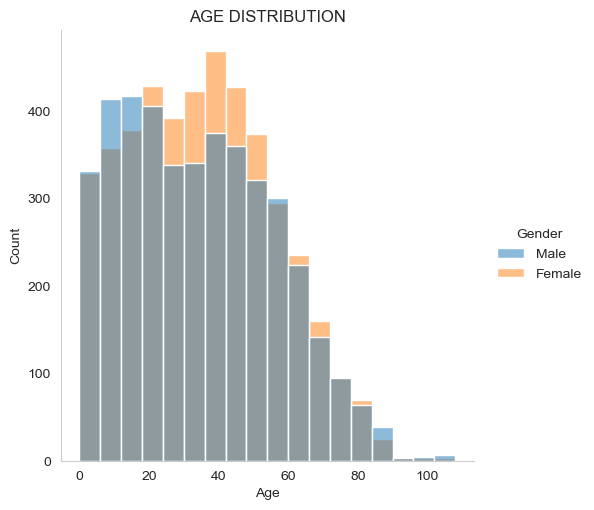

In [102]:
Age_fig =sns.displot(census_df, x="Age", binwidth =6, hue= "Gender")
plt.title("AGE DISTRIBUTION")
plt.grid(False)
plt.show()

Age_fig.savefig('./Age_fig.png') # Saving out my figure


## Age Distribution for both Genders

In [103]:
Male_df = census_df[census_df["Gender"] == "Male"]
Female_df =census_df[census_df["Gender"] == "Female"]

### Average age of Men

In [104]:
Male_df["Age"].mean()

34.167783628530394

### Average age of Women

In [105]:
Female_df["Age"].mean()

34.94112379673159

In [106]:
Female_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Commuters
1,2,George Avenue,Anne,Johnson,34,Head,Married,Female,Corporate treasurer,None,None,False
5,3,George Avenue,Emily,Smith,36,Daughter,Divorced,Female,Press sub,None,None,True
8,4,George Avenue,Dawn,Alexander-Parry,61,Head,Married,Female,Legal executive,None,Catholic,False
10,4,George Avenue,Naomi,Alexander-Parry,24,Daughter,Single,Female,Unemployed,None,None,False
11,4,George Avenue,Marilyn,Alexander-Parry,3,Daughter,Minor(Single),Female,Child,None,Catholic,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8636,1,Byrne Folly,Dawn,Byrne,8,Daughter,Minor(Single),Female,Student,None,None,False
8637,1,Byrne Folly,Christine,Byrne,6,Daughter,Minor(Single),Female,Student,None,None,False
8638,1,Byrne Folly,Ann,Byrne,3,Daughter,Minor(Single),Female,Child,None,None,False
8639,1,Richardson Delve,Irene,Welch,31,Head,Married,Female,Dancer,None,Catholic,False


### Male Age Distribution

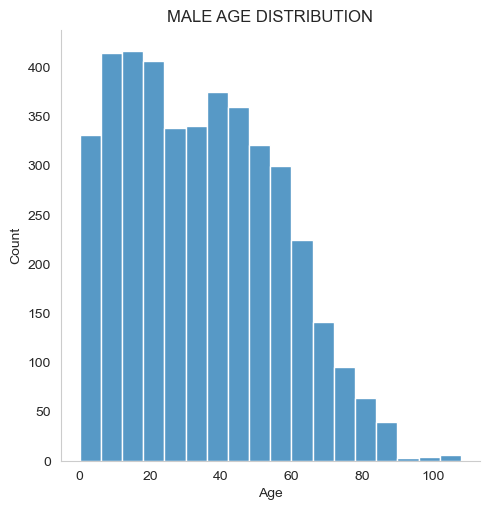

In [107]:
Male_Age_fig =sns.displot(Male_df, x="Age", binwidth =6)
plt.title("MALE AGE DISTRIBUTION")
plt.grid(False)
plt.show()

Male_Age_fig.savefig('./Male_Age_fig.png') # Saving out my figure


### Female Age Distribution

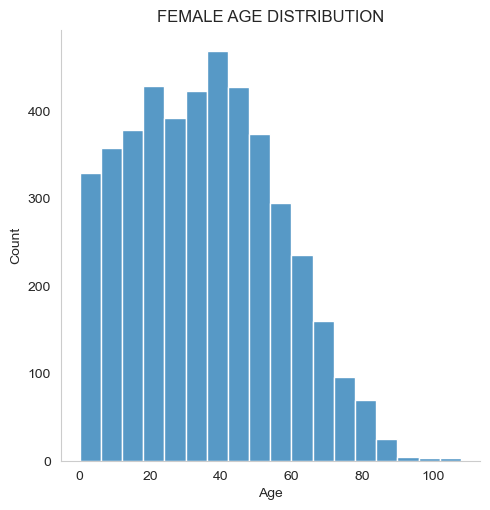

In [108]:
Female_df_fig=sns.displot(Female_df, x="Age", binwidth =6)
plt.title("FEMALE AGE DISTRIBUTION")
plt.grid(False)
plt.show()

Female_df_fig.savefig('./Female_df_fig.png') # Saving out my figure



### Distribution by Gender

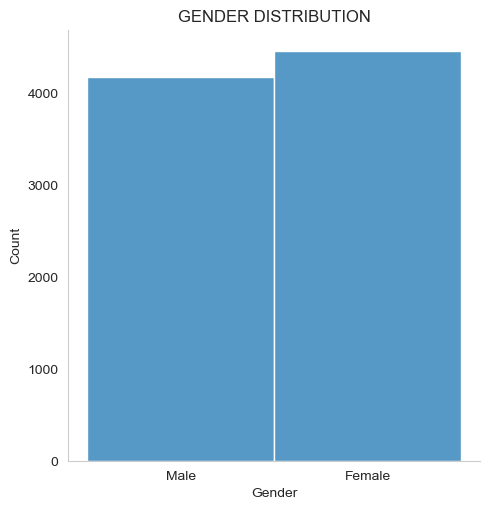

In [109]:
Gender_fig=sns.displot(census_df, x="Gender", binwidth =5)
plt.title("GENDER DISTRIBUTION")
plt.grid(False)
plt.show()

Gender_fig.savefig('./Gender_fig.png') # Saving out my figure


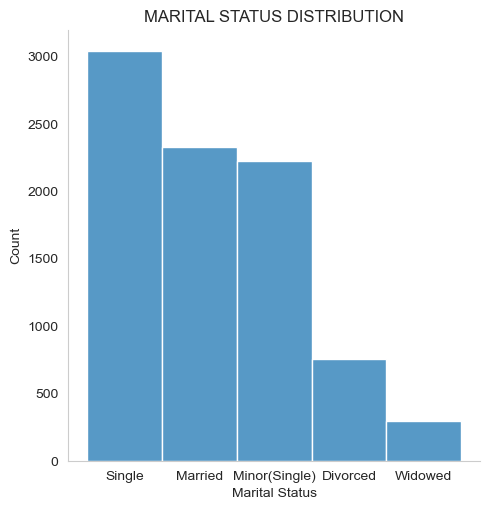

In [110]:
Marital_Status_fig =sns.displot(census_df, x="Marital Status")
plt.title("MARITAL STATUS DISTRIBUTION")
plt.grid(False)
plt.show()

Marital_Status_fig.savefig('./Marital_Status.png') # Saving out my figure


## Examining the Population Trend for possible future size increase

### Create a new column Birth Year 

In [111]:
census_df["Birth Year"] = 1881 - census_df["Age"]

### Visualizing Population Trend by birth year

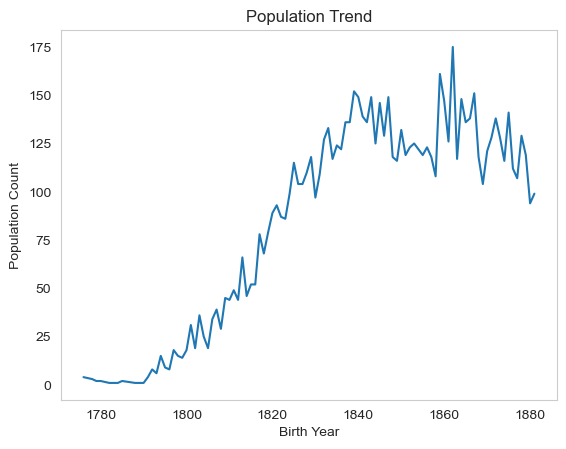

In [112]:
Year_count = census_df.groupby('Birth Year').size()

fig= plt.figure()

pop_trend_fig =plt.plot(Year_count.index, Year_count.values)
plt.xlabel("Birth Year")
plt.ylabel("Population Count")
plt.title("Population Trend")
plt.grid(False)
plt.show()

fig.savefig('./Population_Trend.png') # Saving out my figure


### Cleaned Data

In [113]:
census_df.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
Commuters                        0
Birth Year                       0
dtype: int64